In [ ]:
# Para conocer el enunciado del problema, consultar el libro:
# Metodos Numericos Aplicados a la Ingeniería: Casos de estudio utilizando MATLAB (2014)
# por Héctor Jorquera y Claudio Gelmi
# 
# Código Python escrito por Claudio Gelmi, Ph.D.

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import solve_ivp

In [2]:
def est(t, x):
    # Parámetros y constantes
    cv = 0.1; D1 = 2.5; D2 = 3.0
    Dt = 0.3; F0 = 0.2*0; g = 9.8
    L = 100; mu = 0.001; ro = 1000

    # Relaciones constitutivas
    A1 = np.pi*(D1**2)/4
    A2 = np.pi*(D2**2)/4
    At = np.pi*(Dt**2)/4
    Re = Dt*ro*np.abs(x[2])/mu
    F2 = cv*np.sqrt(np.abs(x[1]))*0
    # Factor de fricción
    if Re <= 2000:
        f = 64/Re
    else:
        f = 0.18/Re**0.2

    # Ecuaciones diferenciales
    dx1 = (F0 - x[2]*At)/A1
    dx2 = (x[2]*At - F2)/A2
    dx3 = g/L*(x[0] - x[1]) - f*x[2]*np.abs(x[2])/(2*Dt)
    return [dx1, dx2, dx3]

# Condiciones iniciales y tiempo de integración
x0 = [2, 5, 1e-8]
t_span = (0, 500)  # Tiempo inicial y final
t = np.linspace(t_span[0], t_span[1], 500) # Puntos en los que queremos la solución

# Integramos las ecuaciones diferenciales
sol = solve_ivp(est, t_span, x0, t_eval=t, method='RK45')

# Extraemos los resultados
h1, h2, v1 = sol.y

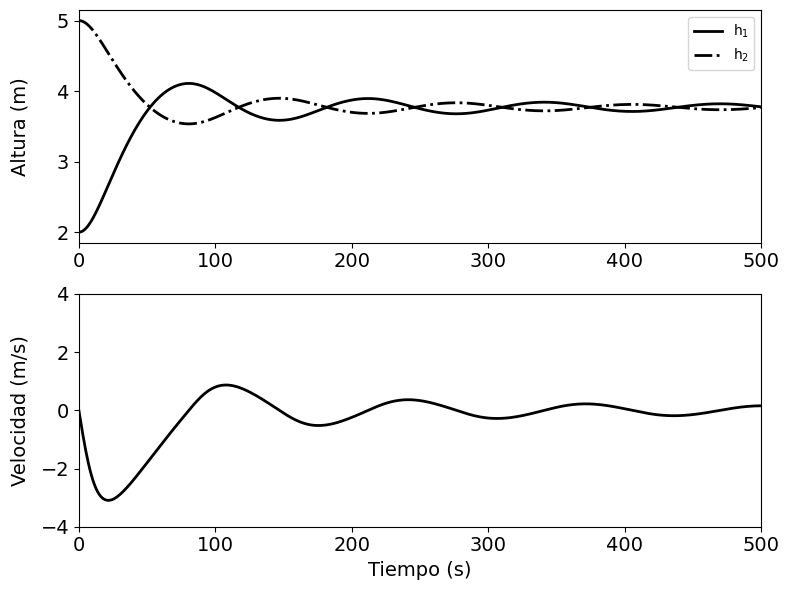

In [3]:
# Graficamos los resultados
plt.figure(figsize=(8,6))

plt.subplot(2, 1, 1)
plt.plot(t, h1, 'k', lw=2)
plt.plot(t, h2, 'k-.', lw=2)
plt.ylabel('Altura (m)', fontsize=14, labelpad=20)
plt.legend(['h$_1$', 'h$_2$'], loc='best')
plt.xlim(0,500)
plt.tick_params(axis='both', labelsize=14)

plt.subplot(2, 1, 2)
plt.plot(t, v1, 'k', lw=2)
plt.xlabel('Tiempo (s)', fontsize=14)
plt.ylabel('Velocidad (m/s)', fontsize=14, labelpad=8)
plt.xlim(0, 500)
plt.ylim(-4, 4)
plt.tick_params(axis='both', labelsize=14)

plt.tight_layout()
plt.show()